In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from collections import defaultdict

In [2]:
# PG: 9.987h; True: 5.309h; FLAT: 5.418h; DeepDB: 5.974h; MSCN: 7.417h; MSCN_ours: 5.480h
# Model size: FLAT 310mb; DeepDB 162mb
# Training time: FLAT 262 min; DeepDB 108 min
# Inference speed: FLAT 175ms per sub-plan query; DeepDB 87ms (multiply by 2603 to get the total planning time)

In [3]:
COLORS = {}
COLORS["MSCN"] = "#4260f5"
COLORS["Robust-MSCN"] = "Green"
COLORS["PostgreSQL"] = "Red"
COLORS["True"] = "Cyan"
COLORS["FLAT"] = "Black"
COLORS["DeepDB"] = "Gray"

In [4]:
data = defaultdict(list)

ESTS = ["PostgreSQL", "True", "FLAT", "DeepDB", "MSCN", "Robust-MSCN"]
SIZES = [0.1, -1, 310, 162, 0.7, 0.7]
TRAINING = [-1, -1, 262, 108, 5, 5]
INFERENCE = [-1, -1, 175*2603, 87*2603, 5*2603, 5*2603]
LATS = [9.987, 5.308, 5.418, 5.974, 7.417, 5.48]

for i in range(len(ESTS)):
    data["Estimator"].append(ESTS[i])
    data["Model Size"].append(SIZES[i])
    data["Training Time"].append(TRAINING[i])
    data["Inference Time"].append(INFERENCE[i] / 1000.0)
    data["Total Latency"].append(LATS[i])

df = pd.DataFrame(data)

In [5]:
df.head(5)

,Estimator,Model Size,Training Time,Inference Time,Total Latency
0,PostgreSQL,0.1,-1,-0.001,9.987
1,True,-1.0,-1,-0.001,5.308
2,FLAT,310.0,262,455.525,5.418
3,DeepDB,162.0,108,226.461,5.974
4,MSCN,0.7,5,13.015,7.417


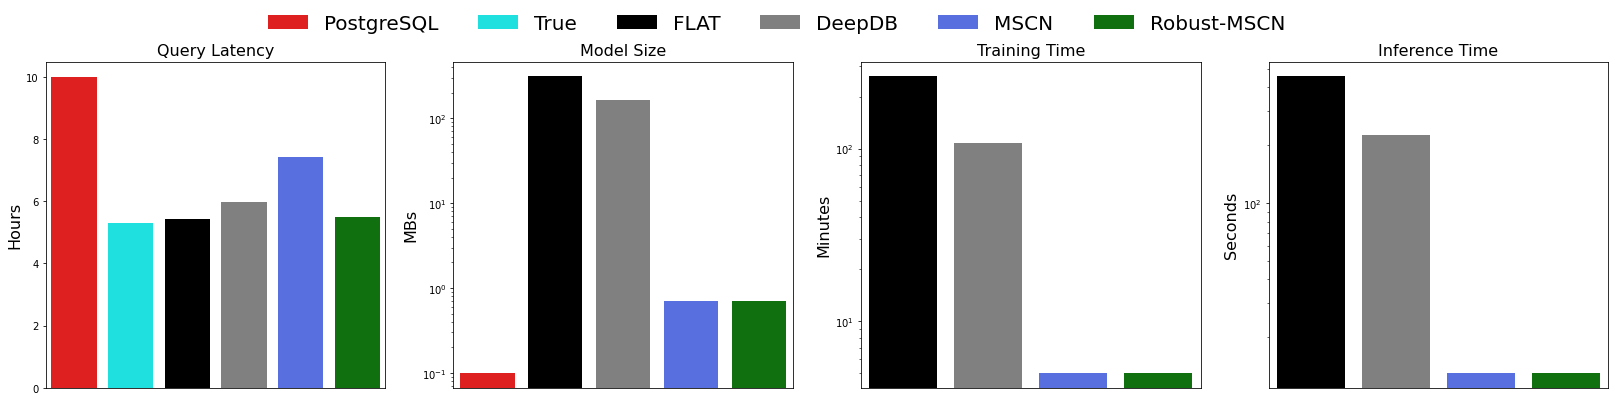

In [12]:
fig,axs = plt.subplots(nrows=1, ncols=4, figsize=(28,6))

ax = axs[0]
sns.barplot(data=df, x="Estimator", y="Total Latency", hue="Estimator",
            dodge=False,
            palette=COLORS, ax=ax)
ax.set_ylabel("Hours", fontsize=16)
#ax.set_xlabel("Estimators", fontsize=16)
ax.set_xlabel("", fontsize=0)
ax.set_xticks([])
ax.set_title("Query Latency", fontsize=16)

ax.legend().remove()
legend = ax.legend(loc='upper left', bbox_to_anchor=(0.6,1.20), ncol=6, frameon=False, 
                  fontsize=20)

ax = axs[1]

tmp = df[df["Model Size"] != -1]
sns.barplot(data=tmp, x="Estimator", y="Model Size", hue="Estimator",
            dodge=False,
            palette=COLORS, ax=ax)

ax.set_ylabel("MBs", fontsize=16)
#ax.set_xlabel("Estimators", fontsize=16)
ax.set_xlabel("", fontsize=0)
ax.set_xticks([])
ax.set_title("Model Size", fontsize=16)
ax.set_yscale("log")
ax.legend().remove()

ax = axs[2]
tmp = df[df["Training Time"] != -1]
sns.barplot(data=tmp, x="Estimator", y="Training Time", hue="Estimator",
            dodge=False,
            palette=COLORS, ax=ax)

ax.set_ylabel("Minutes", fontsize=16)
#ax.set_xlabel("Estimators", fontsize=16)
ax.set_xlabel("", fontsize=0)
ax.set_xticks([])
ax.set_title("Training Time", fontsize=16)
ax.set_yscale("log")
ax.legend().remove()

ax = axs[3]
tmp = df[df["Inference Time"] >= 0]
sns.barplot(data=tmp, x="Estimator", y="Inference Time", hue="Estimator",
            dodge=False,
            palette=COLORS, ax=ax)

ax.set_ylabel("Seconds", fontsize=16)
ax.set_xlabel("", fontsize=0)
ax.set_xticks([])
ax.set_title("Inference Time", fontsize=16)
ax.set_yscale("log")
ax.legend().remove()

plt.savefig("Data-driven-comparison.pdf", bbox_inches="tight")